#Uji Stasioner

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t

file_path2 = "data_train_winsor.xlsx"
data2 = pd.read_excel(file_path2, sheet_name="Sheet1")

y = data2['Curah_Hujan_Winsor']
dy = np.diff(y)  # ΔYt
yt_1 = y[:-1]    # Yt-1

# df regresi
df = pd.DataFrame({'dy': dy, 'yt_1': yt_1})

# Regresi dy terhadap yt-1 (dengan intercept)
X = sm.add_constant(df['yt_1'])
model = sm.OLS(df['dy'], X).fit()

# parameter
theta_hat = model.params['yt_1']
SE_theta = model.bse['yt_1']
tau = theta_hat / SE_theta  # Statistik τ

dfree = len(dy) - 2
p_value = t.cdf(tau, df=dfree)  # P-value sisi kiri (uji satu arah)
n = len(dy)

print(f"θ̂: {theta_hat}")
print(f"SE(θ̂): {SE_theta}")
print(f"τ (t-statistik): {tau}")
print(f"nilai derajat bebas: {dfree}")
print(f"p-value: {p_value:.5f}")
print(f"tau > t: {tau > t.ppf(0.05, n)}")

alpha = 0.05
if tau > t.ppf(alpha, n):
    print("Tolak H0 → Data stasioner")
else:
    print("Gagal Tolak  H0 → Data tidak stasioner")

θ̂: -0.5845292008113244
SE(θ̂): 0.021325925579467938
τ (t-statistik): -27.409323859504337
nilai derajat bebas: 1824
p-value: 0.00000
tau > t: False
Gagal Tolak  H0 → Data tidak stasioner


#Differencing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

file_path = "data_train_winsor.xlsx"

kolom_tanggal = 'Tanggal'
kolom_data = 'Curah_Hujan_Winsor'
jumlah_lags = 30

try:
    df = pd.read_csv(file_path, index_col=kolom_tanggal, parse_dates=True)
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    exit()
except Exception:
    try:
        df = pd.read_excel(file_path, index_col=kolom_tanggal, parse_dates=True)
    except Exception as e:
        print(f"Error: Gagal membaca file. Pastikan formatnya benar. Detail: {e}")
        exit()

original_series = df[kolom_data].dropna()

diff1 = original_series.diff().dropna()
# diff2 = diff1.diff().dropna()

#ACF-PACF

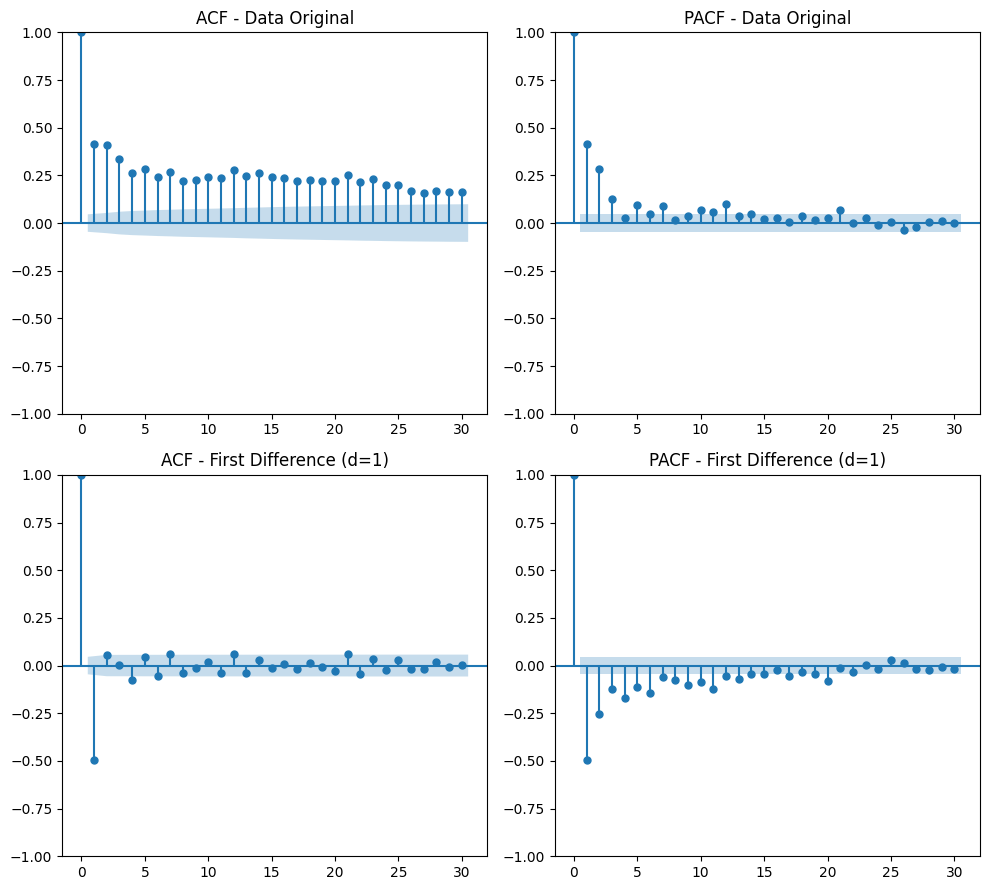

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 9))

plot_acf(original_series, ax=axs[0, 0], lags=jumlah_lags, title='ACF - Data Original')
plot_pacf(original_series, ax=axs[0, 1], lags=jumlah_lags, title='PACF - Data Original')

plot_acf(diff1, ax=axs[1, 0], lags=jumlah_lags, title='ACF - First Difference (d=1)')
plot_pacf(diff1, ax=axs[1, 1], lags=jumlah_lags, title='PACF - First Difference (d=1)')

# plot_acf(diff2, ax=axs[2, 0], lags=jumlah_lags, title='ACF - Second Difference (d=2)')
# plot_pacf(diff2, ax=axs[2, 1], lags=jumlah_lags, title='PACF - Second Difference (d=2)')

plt.tight_layout()
plt.show()

p = 1 karena PACF dari data yang di-differencing cut-off setelah lag 1. Namun harus dicoba untuk p=1, p=2, p=3, dan p=5
d = 1 karena data menjadi stasioner setelah satu kali differencing.
q = 1 karena ACF dari data yang di-differencing cut-off setelah lag 1.